<h1 style="font-size:3em;">Predicting Light Pollution Using Drone Data</h1>

<h4 style="font-size:30px">Objective</h4>

To implement light pollution measurement and analysis using drone data, a general approach to how you can tackle the light pollution measurement problem using drone technology. The data, organized into sub-datasets, is used to analyze how different flight parameters and atmospheric conditions affect the measurements. The performance of the analysis is evaluated by understanding the correlation between various light spectrums (infrared, red, green, and blue) and the night sky brightness (NSB).

<h4 style="font-size:30px">Problem</h4>

The increasing global concern regarding light pollution necessitates accurate and efficient methods for measurement and analysis. This project addresses the need to use Unmanned Aerial Vehicles (UAVs) to collect comprehensive data, including night sky brightness and light intensity across different color bands. The goal is to develop a robust dataset that allows for the study of how environmental factors and drone settings (such as altitude and exposure time) impact the accuracy of light pollution measurements.



<h4 style="font-size=30px">Solution & Procedures</h4>


The project utilizes a dataset containing drone flight information, with each entry corresponding to a specific measurement. The data is organized into six sub-datasets (A1, A2, B1, B2, C1, and C2), which are differentiated by their altitude and exposure time settings. By analyzing the relationships between these variables, the project can draw conclusions about how different flight conditions impact the accuracy and nature of light pollution data.


The project follows these steps to analyze the drone-collected data:

**1.Prepare the Dataset:**

                * Load the dataset from the CSV file (lgdataset1.zip/LP drone data.csv and lgdataset2.zip/LP drone data.csv).
                * Identify the features (e.g., Altitude  (m), Exposure time (sec), Is, Rs, Gs, Bs) and the target variable (NSB (mpsas)) to analyze.

**Analyze Key Variables:**

                 * Examine how altitude affects NSB and the intensity of different light bands.
                 * Investigate the impact of exposure time on the measured values, particularly for the color-band intensities.

**Train a Linear Regression Model:**
                  
                 * You can train a linear regression model to predict NSB based on the intensity of the light bands.
                 * You would split your dataset into training and testing sets (e.g., 80% for training and 20% for testing).
                 * Train the model on the training data.
                 * Evaluate the model's performance on the test data using metrics like Mean Squared Error (MSE) and R-squared (R²).
                 
**Data Visualization:**

                 * Create visualizations to represent the data and analysis. This could include charts or graphs showing the distribution of NSB values across different altitudes or how the intensity of a specific color band changes with varying exposure times.
                 
**Save the Model for Later Use:** 

                *  After training your linear regression model to predict NSB based on the light intensity variables (Is, Rs, Gs, Bs), you'll want to save it to a file. This is crucial so you don't have to retrain the model every time you want to make a prediction. Libraries like joblib are ideal for this. The saved file, often with a .pkl extension, will contain the trained model's parameters.
                
**Load and Use the Model:**
                 
                 * When you need to make a new prediction without retraining, you can load the saved model file back into your program. Once loaded, you can use it to predict NSB for new sets of light intensity data. This process is very efficient for deploying your model in a different application or script.

### Procedures

1. Import required libraries

In [1]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Imthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Imthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Imthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Imthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Imthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

2. Prepare the dataset

Features:

      - Altitude (m): The height of the drone in meters during data collection.
      - Exposure time (sec): The camera's exposure time in seconds.

**Is, Rs, Gs, Bs:** These are the luminous intensity, red, green, and blue light bands, respectively. They are the key input variables used to measure the spectral characteristics of the light pollution.

**Target Variable (NSB):** This is the Night Sky Brightness (NSB), measured in magnitudes per square arc-second (mpsas). NSB is the primary metric for quantifying light pollution and is analyzed in relation to the features. The data shows that the NSB values change based on the altitude and exposure time settings.

2.1 Load Dataset


In [7]:
df = pd.read_csv("lgdataset1.zip")
df.head()

,dataset;Altitude (m);Exposure time (sec);NSB (mpsas);Is;Rs;Gs;Bs
0,A1;70;0.16;14.17;-1.455653998;-1.243167974;-1....
1,A1;70;0.16;14.15;-1.253554623;-1.041240505;-1....
2,A1;70;0.16;15.89;-1.734108618;-1.51687968;-1.7...
3,A1;70;0.16;14.33;-1.586857807;-1.404538771;-1....
4,A1;70;0.16;14.29;-1.487973673;-1.304777485;-1....


In [12]:
df.shape #verifying the number or rows and columns

(134, 8)

In [13]:
df.size # checking total datapoint in the dataset

1072

In [14]:
df.columns # checking the columns names

Index(['dataset', 'Altitude (m)', 'Exposure time (sec)', 'NSB (mpsas)', 'Is',
       'Rs', 'Gs', 'Bs'],
      dtype='object')

In [15]:
df.info # checking the information about the dataset

<bound method DataFrame.info of     dataset  Altitude (m)  Exposure time (sec)  NSB (mpsas)        Is  \
0        A1            70                 0.16        14.17 -1.455654   
1        A1            70                 0.16        14.15 -1.253555   
2        A1            70                 0.16        15.89 -1.734109   
3        A1            70                 0.16        14.33 -1.586858   
4        A1            70                 0.16        14.29 -1.487974   
..      ...           ...                  ...          ...       ...   
129      C2            70                 0.50        14.30 -1.195629   
130      C2            70                 0.50        14.23 -1.529339   
131      C2            70                 0.50        14.60 -1.998839   
132      C2            70                 0.50        14.71 -2.524948   
133      C2            70                 0.50        15.27 -2.667561   

           Rs        Gs        Bs  
0   -1.243168 -1.496825 -2.883574  
1   -1.041241 -1.29

In [16]:
df.describe() # Validating the statistical informarion of the dataset

,Altitude (m),Exposure time (sec),NSB (mpsas),Is,Rs,Gs,Bs
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,79.850746,0.247836,14.773254,-1.614890,-1.343741,-1.663233,-2.415243
std,14.141342,0.134485,0.649508,0.413766,0.398807,0.430457,0.625173
min,70.000000,0.160000,13.920000,-2.848572,-2.616957,-2.946170,-3.000083
25%,70.000000,0.160000,14.335000,-1.805858,-1.545019,-1.849858,-2.868143
50%,70.000000,0.160000,14.575000,-1.523982,-1.250069,-1.573586,-2.690820
75%,100.000000,0.250000,14.907500,-1.336338,-1.068769,-1.383731,-2.172716
max,100.000000,0.500000,17.250000,-0.957171,-0.759860,-0.989391,-1.104565


In [8]:
# Checking for missing values
df.isnull().sum()

dataset;Altitude (m);Exposure time (sec);NSB (mpsas);Is;Rs;Gs;Bs    0
dtype: int64

2.2 Visualizing Class Distribution

C:\Users\Imthi\AppData\Local\Temp\ipykernel_11552\3022924403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


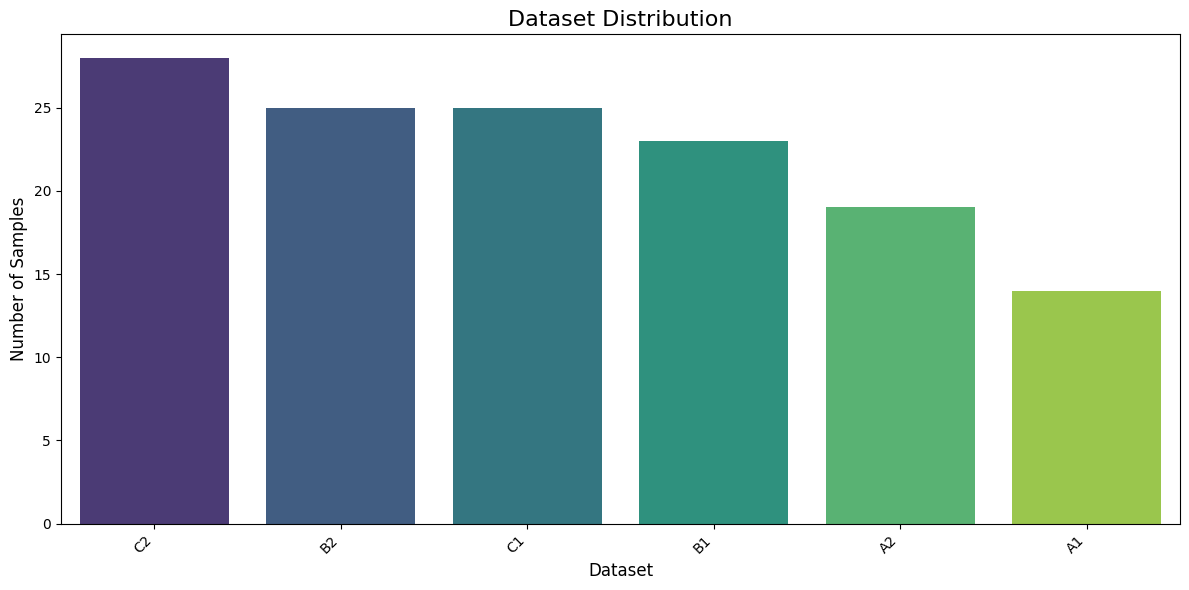

In [25]:
class_distribution = df['dataset'].value_counts().sort_values(ascending=False) #calculating class distribution

# Plot the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Dataset Distribution", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2.3 Applying Feature Correlation with Heatmap

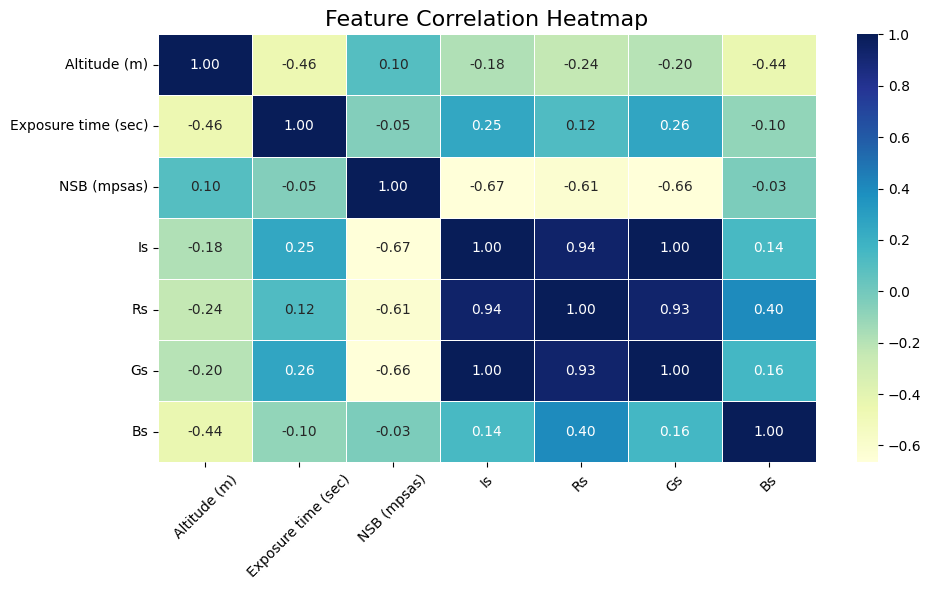

In [29]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()  # Compute correlation for numeric columns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")

# Add titles and labels
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

2.4 Applying Feature Distribution with Histogram

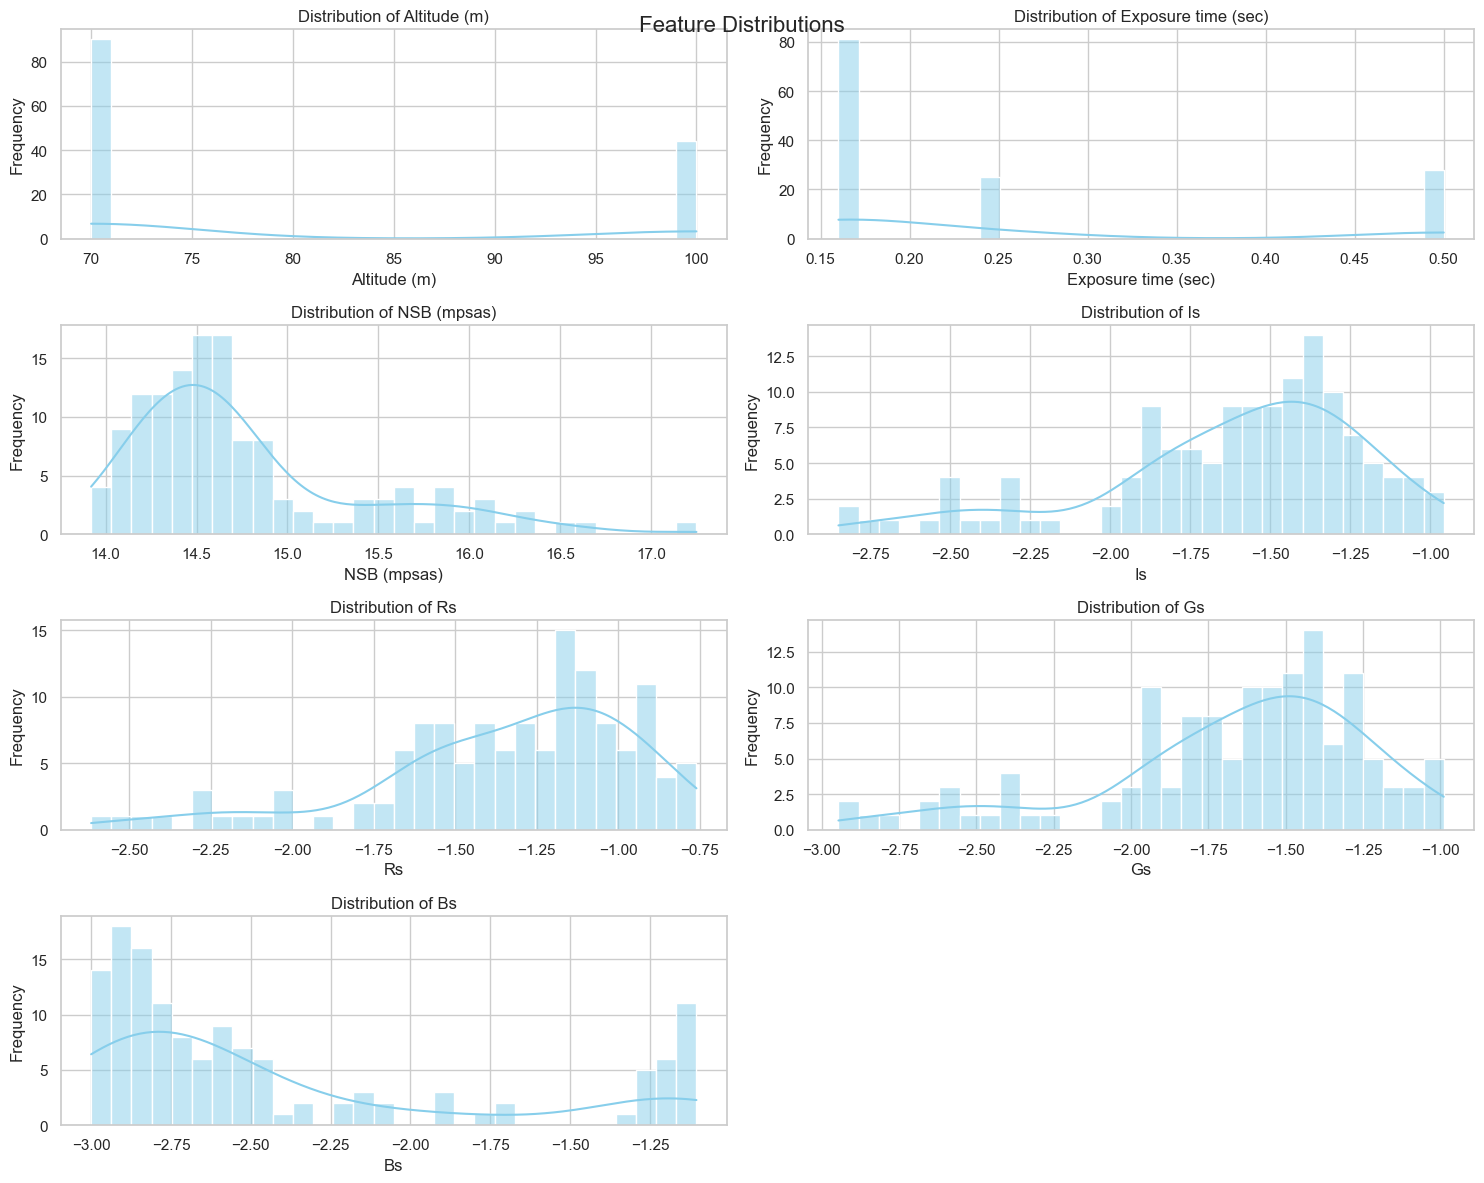

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") #Plot style
plt.figure(figsize=(15, 12))

features = ['Altitude (m)', 'Exposure time (sec)', 'NSB (mpsas)', 'Is', 'Rs', 'Gs', 'Bs'] #List of features to see the distribution

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Handling Outliers

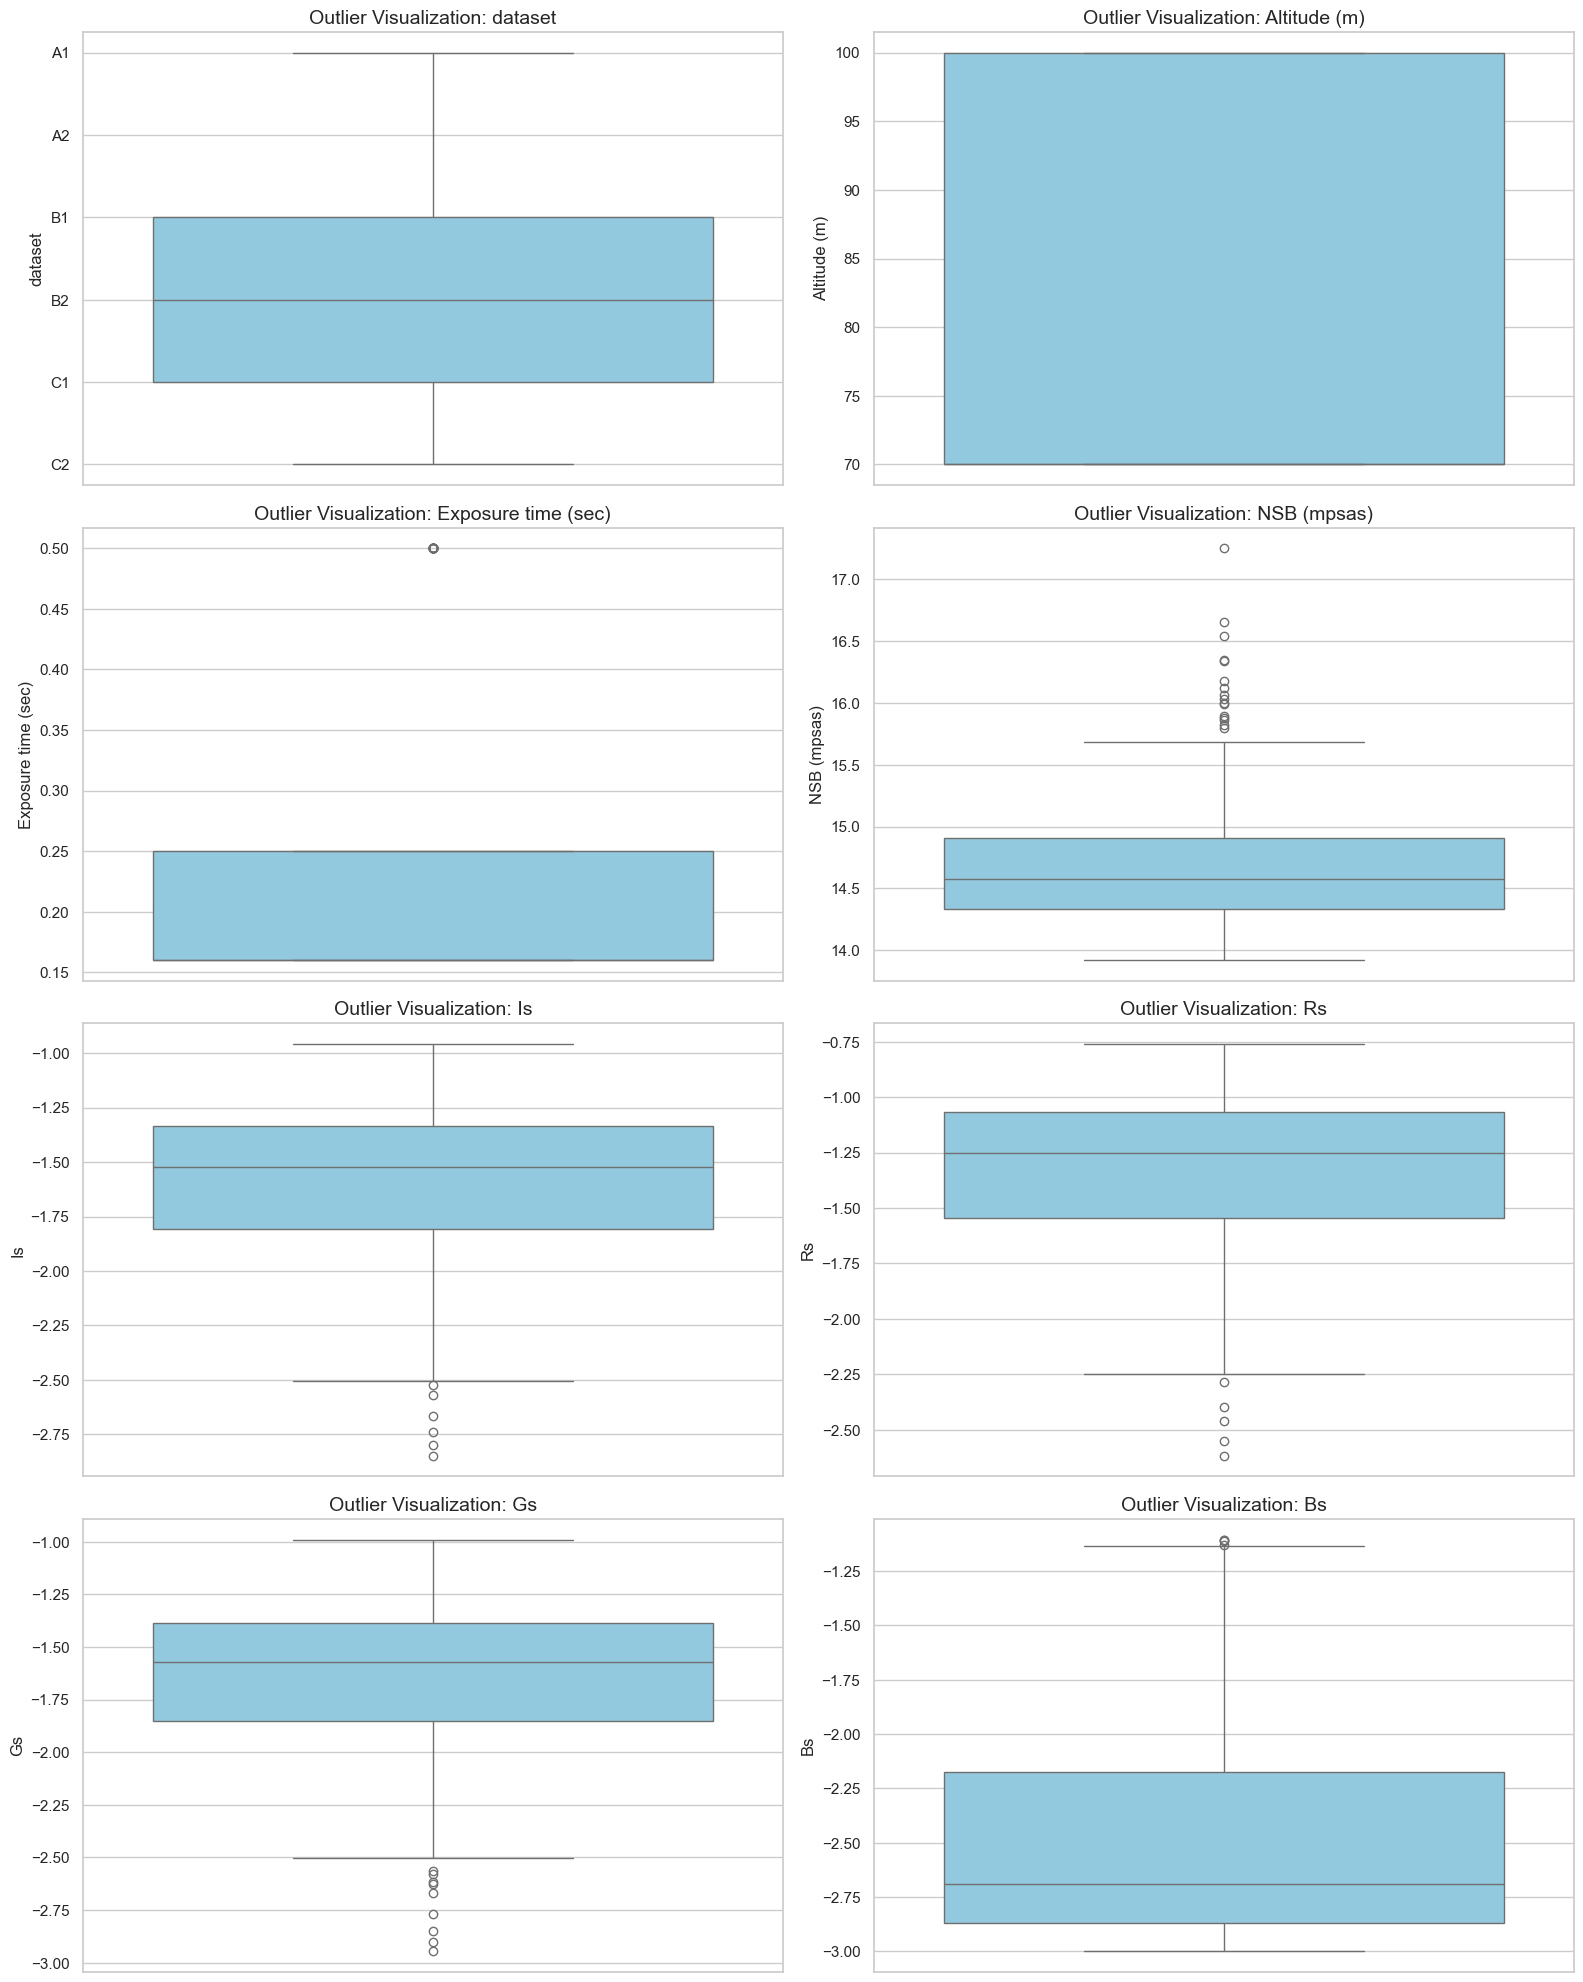

In [35]:
# Identify numeric features
target_col = 'label'
feature_cols = [col for col in df.columns if col != target_col]

# Set up seaborn style
sns.set(style="whitegrid")

# Set up the grid of subplots
n_cols = 2
n_rows = (len(feature_cols) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

# Plot boxplots to visualize outliers
for i, feature in enumerate(feature_cols):
    sns.boxplot(y=df[feature], ax=axes[i], color="skyblue")
    axes[i].set_title(f'Outlier Visualization: {feature}', fontsize=14)

# Remove extra subplots
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

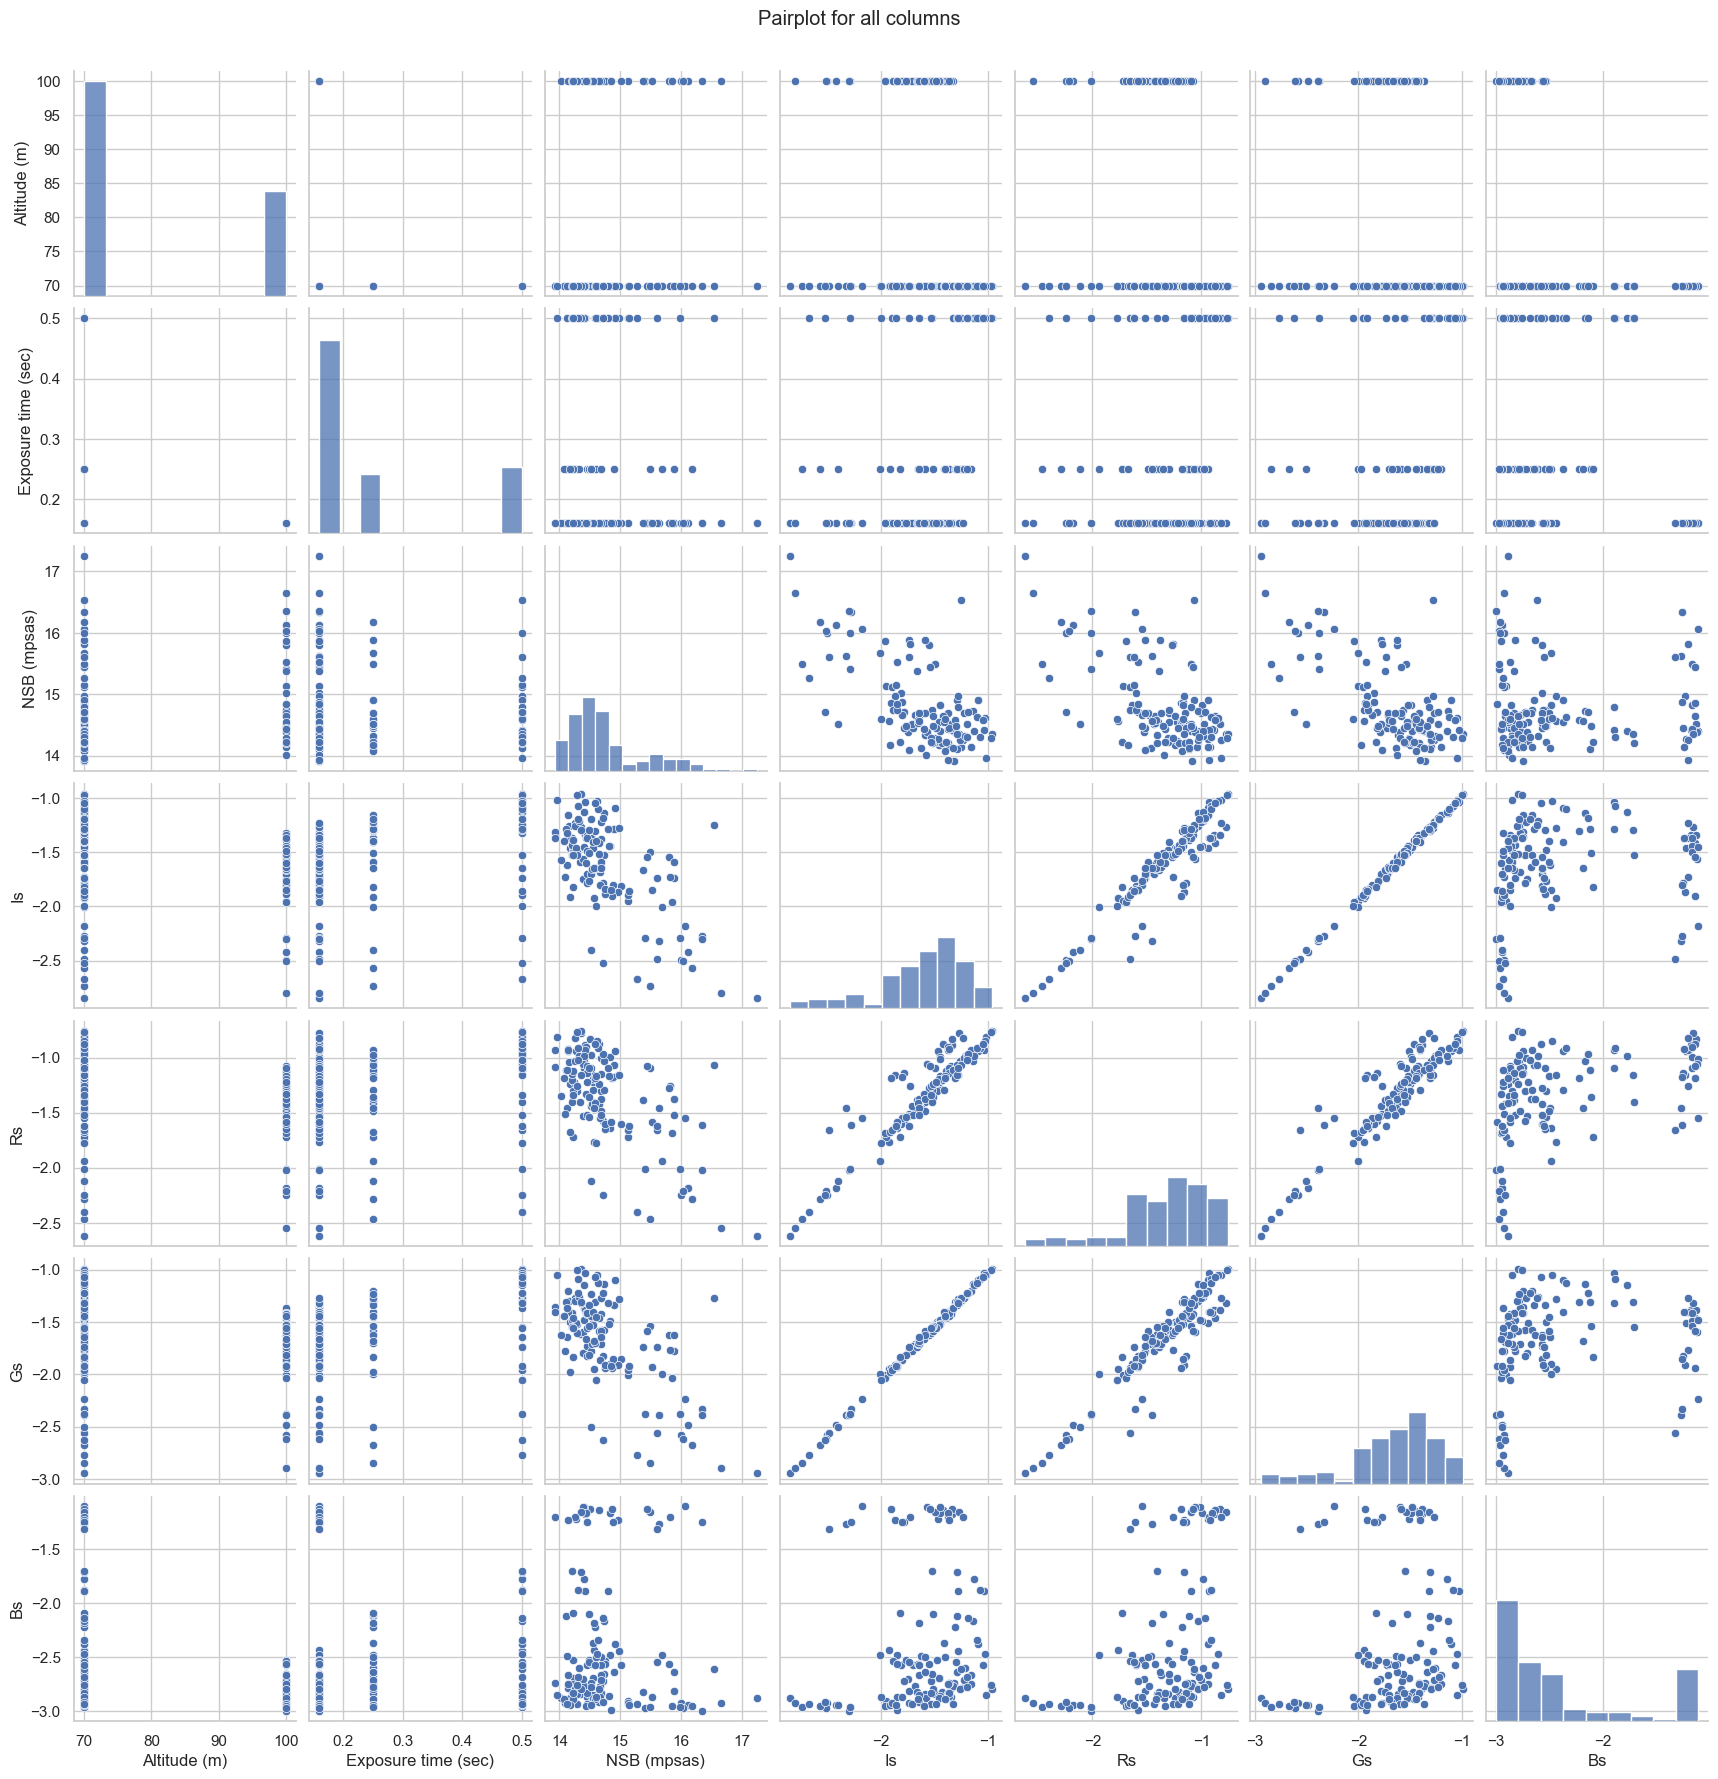

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Altitude (m)', 'Exposure time (sec)', 'NSB (mpsas)', 'Is',
       'Rs', 'Gs', 'Bs']
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot for all columns', y=1.02)
plt.show()

In [39]:
def remove_outliers_iqr(data, features):
    Cleaned_DF = df.copy()
    for feature in features:
        Q1 = Cleaned_DF[feature].quantile(0.25)
        Q3 = Cleaned_DF[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows with outliers
        Cleaned_DF = Cleaned_DF[(Cleaned_DF[feature] >= lower_bound) & (Cleaned_DF[feature] <= upper_bound)]
    return Cleaned_DF

# Only use numeric columns for outlier removal
numeric_features = ['Altitude (m)', 'Exposure time (sec)', 'NSB (mpsas)', 'Is', 'Rs', 'Gs', 'Bs']

# Apply the function
df_no_outliers = remove_outliers_iqr(df, numeric_features)

# Show before and after shapes
print("Original dataset shape:", df.shape)
print("After outlier removal shape:", df_no_outliers.shape)

Original dataset shape: (134, 8)
After outlier removal shape: (71, 8)


In [40]:
df_no_outliers.to_csv("df_no_outliers.csv", index=False)

Encoding the Categorical Values

In [43]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
lab_enc = LabelEncoder()

# Apply label encoding to the 'dataset' column
df_no_outliers['label_encoded'] = lab_enc.fit_transform(df_no_outliers['dataset'])

# View the mapping of labels to numbers
label_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
print("Label Mapping:")
for k, v in label_mapping.items():
    print(f"{k}: {v}")

Label Mapping:
A1: 0
A2: 1
B1: 2
B2: 3
C1: 4


2.2 Select Features and target variable 

In [24]:
import pandas as pd

# Load the dataset, specifying the semicolon (;) as the delimiter
df = pd.read_csv('lgdataset1.zip', delimiter=';')

# Now, select the features and target variable
# Features (X) are the light intensity values
X = df[['Is', 'Rs', 'Gs', 'Bs']]

# Target Variable (y) is the Night Sky Brightness (NSB)
y = df['NSB (mpsas)']



In [52]:
from sklearn.preprocessing import StandardScaler

# Only select numeric columns for scaling
numeric_features = ['Altitude (m)', 'Exposure time (sec)', 'NSB (mpsas)', 'Is', 'Rs', 'Gs', 'Bs']
X_numeric = df_no_outliers[numeric_features]
y = df_no_outliers['label_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Optional: convert scaled features back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

print("Scaled Features (first 5 rows):")
print(X_scaled_df.head())


Scaled Features (first 5 rows):
   Altitude (m)  Exposure time (sec)  NSB (mpsas)        Is        Rs  \
0     -1.014185            -0.648074    -1.056908  0.415069  0.333149   
1     -1.014185            -0.648074    -1.117670  1.342337  1.235045   
2     -1.014185            -0.648074    -0.570816 -0.186918 -0.387604   
3     -1.014185            -0.648074    -0.692339  0.266780  0.057974   
4     -1.014185            -0.648074    -0.905005  0.328625  0.057890   

         Gs        Bs  
0  0.440818 -0.698411  
1  1.363180 -0.387825  
2 -0.090879 -0.583324  
3  0.359791 -0.578619  
4  0.440711  0.417166  


In [61]:
joblib.dump(scaler, 'Scaler.pkl')

['Scaler.pkl']

3. Train a linear regression model

Now, we’ll split the dataset into training and testing sets, train the linear regression model, and evaluate its performance. 


In [64]:
# Let's split the data before applying the Scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# applying standard scaler to the split data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

3.2 Initialize and train the linear regression model 

In [55]:
model = LinearRegression()
model.fit(X_train[numeric_features], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


4. Evaluate the model

After training your linear regression model on the light pollution data, you can evaluate its performance to see how accurately it predicts the NSB.



4.1 Predicting the NSB output on the test set

In [57]:
# Predicting the NSB output on the test set
y_pred = model.predict(X_test[numeric_features])

Predicted outputs of test dataset

In [58]:
y_pred

array([ 1.43258878, -0.21018655,  2.52901427, -0.40270529,  4.30606605,
        1.87488006, -0.06817158,  2.30969841,  2.34861555,  2.23235532,
        2.24696548,  0.35021762,  4.02921052, -0.40903316,  3.91518524])

4.2 Evaluate the model performance

In [59]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3175756915985613
R-squared: 0.875946995469312


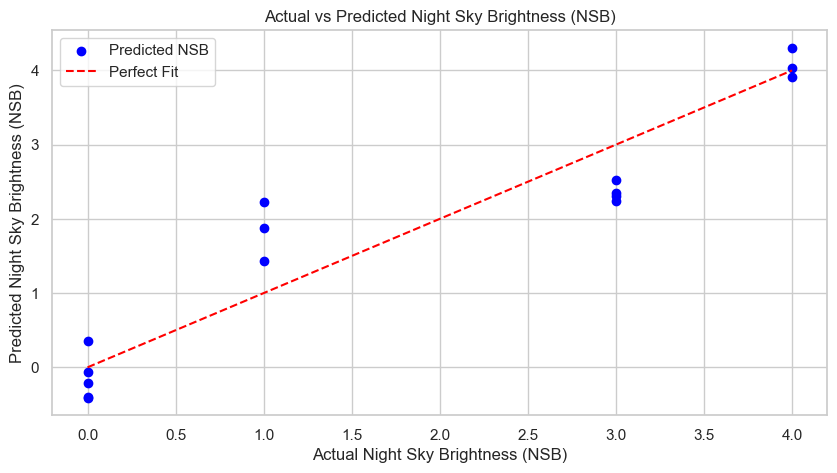

In [60]:
import matplotlib.pyplot as plt

# Scatter plot to compare actual vs predicted values
# Using blue color to represent the blue light band
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted NSB')

# Diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel("Actual Night Sky Brightness (NSB)")
plt.ylabel("Predicted Night Sky Brightness (NSB)")
plt.title("Actual vs Predicted Night Sky Brightness (NSB)")
plt.legend()
plt.show()

- Each blue dot represents a comparison between an actual and predicted value.
- The red dashed line represents a perfect fit line, where predicted values would exactly match actual values if the model were perfect.
- The closer the points are to this line, the better the model's accuracy. 


Model Selection and Model Building

In [66]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([3, 0, 3, 0, 4, 3, 0, 1, 3, 3, 3, 0, 4, 0, 4])

In [69]:
from sklearn.metrics import accuracy_score, classification_report

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.7333333333333333

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         3
           3       0.50      0.75      0.60         4
           4       1.00      1.00      1.00         3

    accuracy                           0.73        15
   macro avg       0.62      0.69      0.65        15
weighted avg       0.67      0.73      0.69        15



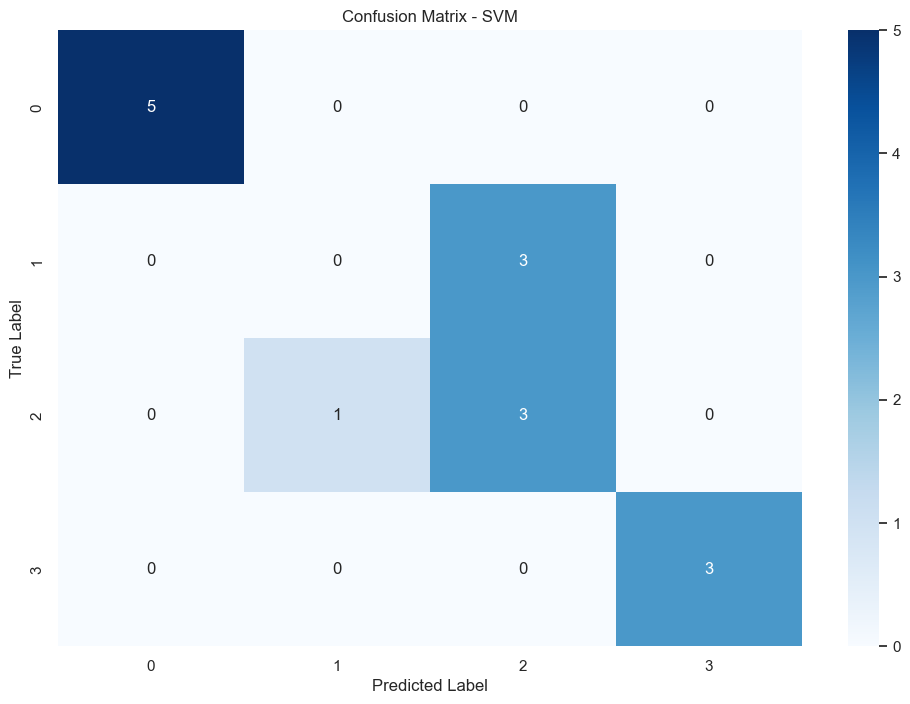

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
# Take user input for light pollution classification
def get_float_input(prompt):
    while True:
        value = input(prompt)
        try:
            return float(value)
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def get_user_input():
    print("Enter the following values for light pollution classification:")
    altitude = get_float_input("Altitude (m): ")
    exposure_time = get_float_input("Exposure time (sec): ")
    nsb = get_float_input("NSB (mpsas): ")
    is_ = get_float_input("Is (Infrared band): ")
    rs = get_float_input("Rs (Red band): ")
    gs = get_float_input("Gs (Green band): ")
    bs = get_float_input("Bs (Blue band): ")
    return pd.DataFrame([{
        'Altitude (m)': altitude,
        'Exposure time (sec)': exposure_time,
        'NSB (mpsas)': nsb,
        'Is': is_,
        'Rs': rs,
        'Gs': gs,
        'Bs': bs
    }])

# Get user input
user_df = get_user_input()

# Scale the user input using the trained scaler
user_scaled = scaler.transform(user_df)

# Make prediction
predicted_label_encoded = svm_model.predict(user_scaled)[0]

# Decode the prediction to dataset name
inv_label_mapping = {v: k for k, v in label_mapping.items()}
predicted_dataset = inv_label_mapping[predicted_label_encoded]

print("\nPredicted Dataset:", predicted_dataset)


Enter the following values for light pollution classification:

Predicted Dataset: C1


Saving the Model using Joblib

In [73]:
joblib.dump(svm_model, 'light_pollution.pkl')

['light_pollution.pkl']